In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# 선형 회귀
# model, Linear Regression : 가중치를 작게 제약시킨다. -> 모든 정보(컬럼)을 골고루 반영해서 결과를 예측할수있다.
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression # 예측용/분류용

# 결정 트리
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 분류용/예측용
# 108 트리 그림 그리기(파일로 트리를 저장합니다)
from sklearn.tree import export_graphviz
import graphviz # anaconda prompt / pip install graphviz
import os # tree그리기
from sklearn.svm import SVC, SVR # SVM-C 분류용, SVM-R회귀용
import mglearn


'''
with open('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)
'''

# 클러스터링
from sklearn.cluster import AgglomerativeClustering # KMeans
from sklearn.decomposition import PCA # 병합군집 : 2차원으로 변환한 후 k개로 클러스터링
from sklearn.cluster import DBSCAN # DBSCAN

1. stock market prediction > regression
- input : 한국 COSPI + 미국 DZIA 검색
- output : COSPI 미래의 1일 ~ 1개월 간의 종가 예측
(한국증권/미국증권 데이터 사용)

In [180]:
url = 'https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page='
kospi = []
kospis =[]
max_num = 30
for i in range(1,max_num):
    tables = pd.read_html(url+str(i),index_col=0)
    kospi=tables[0]
    kospis.append(kospi)
len(kospis)    

29

In [182]:
kospi = pd.concat(kospis, axis=0)

In [183]:
kospi.tail()

,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018.11.06,2089.62,12.70,+0.61%,307933.0,5007974.0
2018.11.05,2076.92,19.08,-0.91%,353462.0,4830435.0
2018.11.02,2096.00,71.54,+3.53%,364081.0,6635295.0
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
url_edj='https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI'
table_edj=pd.read_html(url_edj)

In [185]:
edj = table_edj[0]

In [186]:
edj = edj.set_index('Date')

In [193]:
edj = edj.dropna()

In [194]:
edj.index = pd.to_datetime(edj.index)

ValueError: ('Unknown string format:', '*Close price adjusted for splits.**Adjusted close price adjusted for both dividends and splits.')

In [145]:
x_list

[array([[2072.92, 18.95, '-0.91%', 752119.0, 4549215.0],
        [2091.87, 9.39, '+0.45%', 674500.0, 5158374.0],
        [2082.48, 4.18, '-0.20%', 455075.0, 3656611.0],
        [2086.66, 6.08, '+0.29%', 398353.0, 3714594.0],
        [2080.58, 21.8, '+1.06%', 368242.0, 4934006.0],
        [2058.78, 6.75, '+0.33%', 350018.0, 3867014.0]], dtype=object),
 array([[2052.03, 12.14, '-0.59%', 433474.0, 4361543.0],
        [2064.17, 46.42, '-2.20%', 507760.0, 4275766.0],
        [2110.59, 1.86, '+0.09%', 452463.0, 3959700.0],
        [2108.73, 12.71, '+0.61%', 440234.0, 4471126.0],
        [2096.02, 26.0, '-1.23%', 510185.0, 4512416.0],
        [2122.02, 7.72, '-0.36%', 442102.0, 4031531.0]], dtype=object),
 array([[2129.74, 0.88, '-0.04%', 405153.0, 4544544.0],
        [2130.62, 3.7, '-0.17%', 529503.0, 4191165.0],
        [2134.32, 12.47, '+0.59%', 637264.0, 5064017.0],
        [2121.85, 0.21, '+0.01%', 725559.0, 4389757.0],
        [2121.64, 4.69, '-0.22%', 634514.0, 4198154.0],
        [212

In [146]:
xx_list = np.reshape(x_list,[-1,5])
X = xx_list[:,0]

In [147]:
window_week=4
window_day=window_week * 5 # 5일
predict_day = 30
window_day

20

In [148]:
offset=2
before = X[:-predict_day] # 최근 데이터 5개 빼고
later = X[window_day:] # 과거 데이터 20개 빼고
before.shape, later.shape

((54,), (64,))

In [149]:
m = len(X) - (predict_day + window_day -1)
m

35

In [150]:
x_list = []
y_list = []
for i in range(m):
    x = X[i:i+window_day] # 1 to 21 ... 20일간의 데이터
    y = X[i+window_day:i+window_day+predict_day] # 그다음 5일간의 데이터
    x_list.append(x) # 날짜 인덱스 빼고 값만 저장
    y_list.append(y)

In [151]:
X = np.array(x_list)
y = np.array(y_list)

In [152]:
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33, 20), (2, 20), (33, 30), (2, 30))

In [153]:
from sklearn.neighbors import KNeighborsRegressor # rEGRESSOR 실수 예측용
knn = KNeighborsRegressor(n_neighbors=1) # 클래스의 instance 생성 문법
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [154]:
knn = KNeighborsRegressor(n_neighbors=1) # 클래스의 instance 생성 문법
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [155]:
knn.predict(X_test), knn.predict(X_train)

(array([[2090.73, 2095.41, 2103.15, 2108.75, 2111.81, 2099.49, 2072.33,
         2069.11, 2066.97, 2067.85, 2041.74, 2038.8, 2023.32, 2048.83,
         2044.21, 2045.31, 2059.59, 2064.86, 2061.25, 2055.71, 2055.8,
         2067.69, 2092.78, 2081.84, 2079.01, 2108.04, 2102.01, 2168.01,
         2176.99, 2196.32],
        [2090.73, 2095.41, 2103.15, 2108.75, 2111.81, 2099.49, 2072.33,
         2069.11, 2066.97, 2067.85, 2041.74, 2038.8, 2023.32, 2048.83,
         2044.21, 2045.31, 2059.59, 2064.86, 2061.25, 2055.71, 2055.8,
         2067.69, 2092.78, 2081.84, 2079.01, 2108.04, 2102.01, 2168.01,
         2176.99, 2196.32]], dtype=object),
 array([[2090.73, 2095.41, 2103.15, 2108.75, 2111.81, 2099.49, 2072.33,
         2069.11, 2066.97, 2067.85, 2041.74, 2038.8, 2023.32, 2048.83,
         2044.21, 2045.31, 2059.59, 2064.86, 2061.25, 2055.71, 2055.8,
         2067.69, 2092.78, 2081.84, 2079.01, 2108.04, 2102.01, 2168.01,
         2176.99, 2196.32],
        [2095.41, 2103.15, 2108.75, 2111.8

In [156]:
from sklearn.linear_model import LinearRegression, Ridge
lr = Ridge().fit(X_train, y_train)

In [157]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9474838162966475, -58.85027479041965)

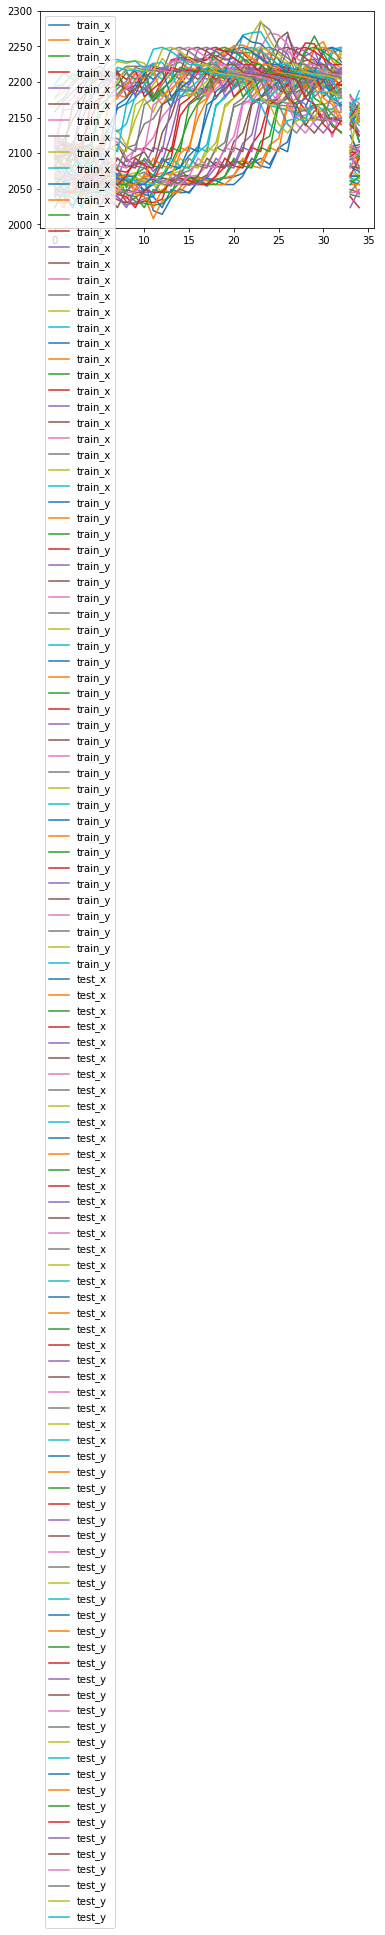

In [158]:
# 예측을 그래프로 시각화
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train) + len(X_test))
plt.plot(train_len, lr.predict(X_train), label = 'train_x')
plt.plot(train_len, y_train, label = 'train_y')
plt.plot(test_len, lr.predict(X_test), label = 'test_x')
plt.plot(test_len, y_test, label = 'test_y')
plt.legend()

2. Loan default prediction > classfication
input : 검색

3. credit card fraud detection > clustering
input : 검색